# Data Preprocessing
- This Jupyter Notebook uses a validated dataset of student's education levels to estimate student's exam scores based on socioeconomic and other features.

## Load the required dependencies

Load the two required dependencies:

 - Pandas is library for data analysis and manipulation.
 - Matplotlib a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Store the data as a local variable
The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [2]:
data_frame = pd.read_csv("1.1.4.Student_Scores_Data.csv")

## Data Summary
The info() method call prints a summary of each column, giving you more information about the specific data types, total number of rows, null values and memory usage.

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Statistics For Numerical Columns
The describe() method call provides basic statistical knowledge like the mean and spread of the data.

In [4]:
data_frame.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Graphically present the data
At this early stage you are just wanting to evaluate the data, the below simple plots lets you look the data in different ways to inform your model design and data wrangling approaches.

<Axes: >

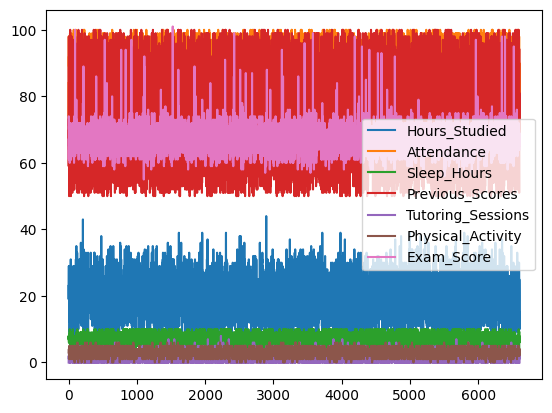

In [5]:
# plot a line graph 
data_frame.plot()

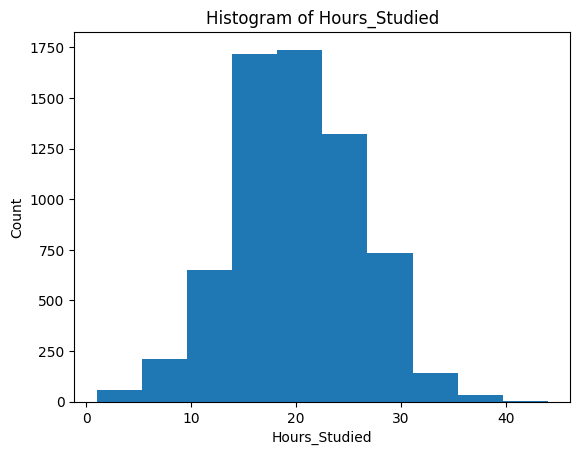

In [6]:
# Plot a histogram of a column
plt.hist(data_frame['Hours_Studied'])
plt.title(f"Histogram of {data_frame['Hours_Studied'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame["Hours_Studied"].name}')
plt.show()

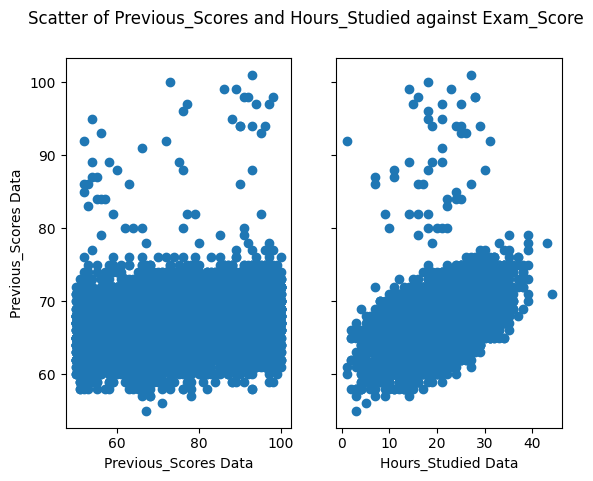

In [7]:
# Scatter plot 2 columns in separate charts with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
plt.suptitle(f"Scatter of {data_frame['Previous_Scores'].name} and {data_frame['Hours_Studied'].name} against {data_frame['Exam_Score'].name}")
ax1.set_ylabel(f'{data_frame['Previous_Scores'].name} Data')

ax1.scatter(data_frame['Previous_Scores'], data_frame['Exam_Score'])
ax1.set_xlabel(f'{data_frame['Previous_Scores'].name} Data')

ax2.scatter(data_frame['Hours_Studied'], data_frame['Exam_Score'])
ax2.set_xlabel(f'{data_frame['Hours_Studied'].name} Data')

plt.show()


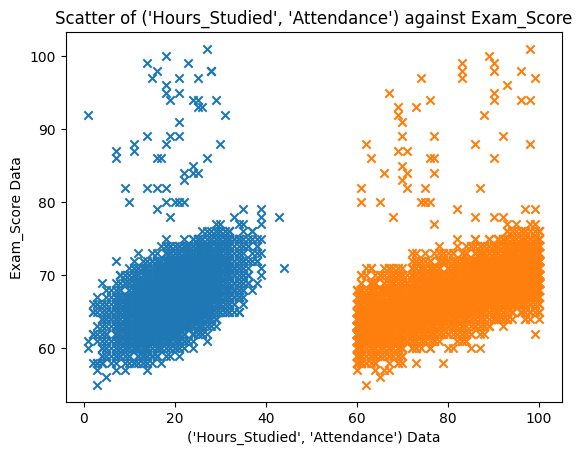

In [9]:
# Scatter plot multiples columns to see the relationship
x_plot = ['Hours_Studied', 'Attendance']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['Exam_Score'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['Exam_Score'].name}")
plt.ylabel(f'{data_frame['Exam_Score'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

As this dataframe shows, there is a clear linear relationship of the data but also alot of outliers.

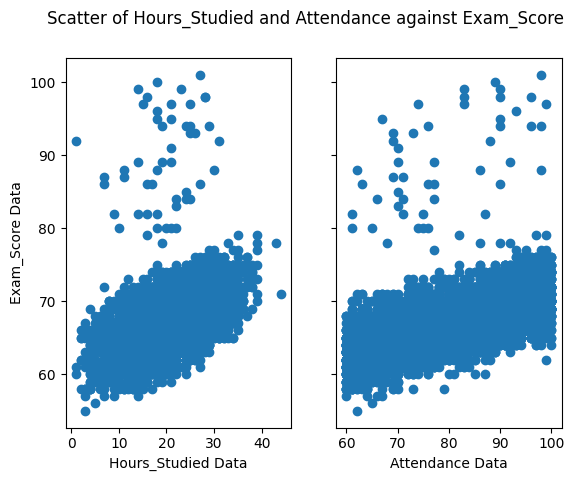

In [10]:
# Scatter plot 2 columns in separate charts with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
plt.suptitle(f"Scatter of {data_frame['Hours_Studied'].name} and {data_frame['Attendance'].name} against {data_frame['Exam_Score'].name}")
ax1.set_ylabel(f'{data_frame['Exam_Score'].name} Data')

ax1.scatter(data_frame['Hours_Studied'], data_frame['Exam_Score'])
ax1.set_xlabel(f'{data_frame['Hours_Studied'].name} Data')

ax2.scatter(data_frame['Attendance'], data_frame['Exam_Score'])
ax2.set_xlabel(f'{data_frame['Attendance'].name} Data')

plt.show()

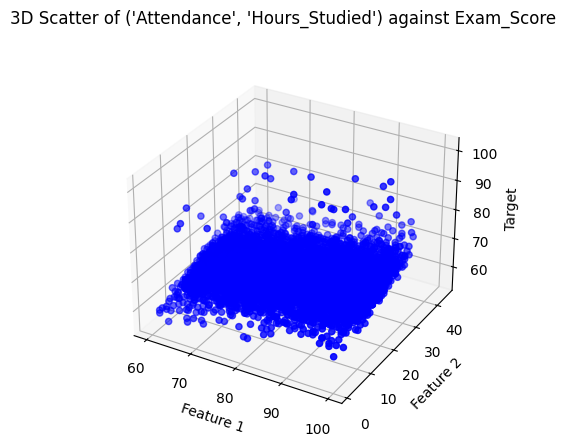

In [11]:
# 3D Scatter plot 3 columns to see the relationship

x_plot = ['Attendance', 'Hours_Studied']

fig = plt.figure()
plt.suptitle(f"3D Scatter of {*x_plot,} against {data_frame['Exam_Score'].name}")
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_frame[x_plot[0]], data_frame[x_plot[1]], data_frame['Exam_Score'], color='blue')

x1_range = np.linspace(data_frame[x_plot[0]].min(), data_frame[x_plot[0]].max())
x2_range = np.linspace(data_frame[x_plot[1]].min(), data_frame[x_plot[1]].max())
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)


ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()